In [35]:
#imports
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle

from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten

from sklearn.preprocessing import MultiLabelBinarizer

In [36]:
#import X and Y data
X = list(np.load('../data/SeasonsFullX.npy'))
Y = list(np.load('../data/SeasonsFullY.npy'))

In [37]:
#train test split
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.1, random_state = 3791)

In [38]:
#count the occurances of each tag to balance training data
from collections import Counter

#print(trainY)
trainlist = []
for y in trainY:
    for word in y:
        trainlist.append(word)
#print(trainlist)
c = Counter(trainlist)
print(c)

Counter({'summer': 93121, 'spring': 62144, 'fall': 61326, 'winter': 30892})


In [39]:
underList = ['fall','spring']

In [40]:
length = len(trainY)
print(length)
for i in range(0, length):
    for word in trainY[i]:
        if word in underList:
            trainY.append(trainY[i])
            trainX.append(trainX[i])
        if word == 'winter':
            trainY.append(trainY[i])
            trainX.append(trainX[i])
            trainY.append(trainY[i])
            trainX.append(trainX[i])
            trainY.append(trainY[i])
            trainX.append(trainX[i])

            
print(len(trainY))
print(len(trainX))

173891
390037
390037


In [41]:
trainlist = []
for y in trainY:
    for word in y:
        trainlist.append(word)
c = Counter(trainlist)
print(c)

Counter({'spring': 164376, 'fall': 162357, 'summer': 153789, 'winter': 143707})


In [42]:
#classes for training
classesX100 = ['down', 'polyester', 'linen', 'pink', 'jean', 'panties', '21', 'crimson', 'mustard', 'parka', 'flare', 'oversized', 'tartan', 'boyfriend', 'feather', 'dotted', 'headband', 'eggshell', 'detail', 'biker', 'glasses', 'puce', 'turtleneck', 'sequin', 'zara', 'waist', 'pants', 'amethyst', 'ivory', 'jumpsuit', 'poncho', 'coat', 'mint', 'platform', 'teal', 'sandals', 'cream', 'gum', 'chartreuse', 'sleeves', 'sleeve', 'tawny', 'leopard', 'tweed', 'tan', 'ripped', 'creepers', 'oxfords', 'fringed', 'satin', 'cardigan', 'sweater', 'scarf', 'jumper', 'wash', 'fringe', 'platforms', 'blazer', 'chelsea', 'tulle', 'h&m', 'heel', 'dress', 'overalls', 'grey', 'glitter', 'velvet', 'oxford', 'neutral', 'coral', 'zipper', 'beret', 'shoes', 'white', 'round', 'skinny', 'snakeskin', 'bow', 'motorcycle', 'cowboy', 'blue', 'buckle', 'vintage', 'romper', 'beanie', 'pleated', 'flowers', 'cap', 'purple', 'bodycon', 'waisted', 'beaded', 'flower', 'wedge', 'peplum', 'brown', 'block', 'sheer', 'quilted', 'sweatshirt', 'black', 'blouse', 'brogues', 'flats', 'back', 'embellished', 'backpack', 'cropped', 'printed', 'tank', 'patterned', 'sequins', 't-shirt', 'striped', 'studs', 'clutch', 'tunic', 'cutout', 'jacket', 'beige', 'military', 'shift', 'ring', 'tote', 'cashmere', 'hat', 'collar', 'straw', 'lace', 'crochet', 'dye', 'earrings', 'watch', 'litas', 'aquamarine', 'asymmetrical', 'chiffon', 'corset', 'blend', 'ruffled', 'diy', 'bronze', 'wool', 'kimono', 'print', 'booties', 'fedora', 'accessory', 'lace-up', 'skater', 'stripe', 'accessories', 'stripes', 'denim', 'maroon', 'wrap', 'green', 'trench', 'periwinkle', 'gifted', 'sunglasses', 'heels', 'bracelet', 'navy', 'mini', 'knit', 'gloves', 'wedges', 'lita', 'leg', 'chain', 'yellow', 'sequined', 'toe', 'gold', 'distressed', 'intimate', 'orange', 'tee', 'bomber', 'shirt', 'magenta', 'leather', 'bag', 'silver', 'pencil', 'jeans', 'loose', 'high', 'gray', 'bra', 'mesh', 'crop', 'suede', 'strap', 'hoodie', 'neon', 'red', 'ruffle', 'shoulder', 'pumps', 'checkered', 'leggings', 'boot', 'metallic', 'swimwear', 'bustier', 'cape', 'plaid', 'skirt', 'thrifted', 'dot', 'tights', 'stockings', 'floral', 'up', 'vest', 'out', 'cotton', 'fur', 'salmon', 'satchel', 'boots', 'violet', 'style', 'jeggings', 'clogs', 'silk', 'embroidered', 'bowler', 'v-neck', 'high-waisted', 'peach', 'pattern', 'casual', 'combat', 'khaki', 'jersey', 'sneakers', 'maxi', 'nude', 'ankle', 'tie', 'knitted', 'shorts', 'loafers', 'long', 'dots', 'purse', 'suit', 'knee', 'belt', 'camel', 'socks', 'bodysuit', 'gingham', 'midi', 'neck', 'sleeveless', 'necklace', 'chambray', 'studded', 'eye']
classesYSeasons = ['winter','spring','summer','fall']

In [43]:
#convert to vectors using multilabel binarizer
mlbX = MultiLabelBinarizer(classes = classesX100)
mlbX.fit(X)
trainX = mlbX.transform(trainX)
testX = mlbX.transform(testX)

mlbY = MultiLabelBinarizer(classes = classesYSeasons)
mlbY.fit(Y)
trainY = mlbY.transform(trainY)
testY = mlbY.transform(testY)

In [44]:
f = open('LabelbinX', 'wb')
f.write(pickle.dumps(mlbX))
f.close()

f = open('LabelbinY', 'wb')
f.write(pickle.dumps(mlbY))
f.close()

In [45]:
class_names = mlbY.classes_

In [46]:
#make model in keras
num_classes = len(mlbY.classes_)
batch =1000
epochs = 5
vocabulary_size = len(mlbX.classes_)    
embedding_dim = 10

model = Sequential()


model.add(Dense(32, input_shape = (len(mlbX.classes_),),activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

trainX = trainX.astype('int64')
trainY = trainY.astype('int64')
testX = testX.astype('int64')
testY = testY.astype('int64')

In [47]:
#train network
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
 
# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, batch_size = batch,
                        validation_data=(testX, testY),
                        epochs=epochs, verbose=1)

[INFO] training network...
Train on 390037 samples, validate on 19322 samples
Epoch 1/5
390037/390037 [==============================] - 5s 14us/sample - loss: 0.6545 - accuracy: 0.6475 - val_loss: 0.6115 - val_accuracy: 0.6790
Epoch 2/5
390037/390037 [==============================] - 5s 13us/sample - loss: 0.6469 - accuracy: 0.6497 - val_loss: 0.6060 - val_accuracy: 0.6831
Epoch 3/5
390037/390037 [==============================] - 5s 12us/sample - loss: 0.6442 - accuracy: 0.6505 - val_loss: 0.6090 - val_accuracy: 0.6836
Epoch 4/5
390037/390037 [==============================] - 5s 13us/sample - loss: 0.6425 - accuracy: 0.6509 - val_loss: 0.6091 - val_accuracy: 0.6804
Epoch 5/5
390037/390037 [==============================] - 5s 13us/sample - loss: 0.6409 - accuracy: 0.6516 - val_loss: 0.6085 - val_accuracy: 0.6829


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


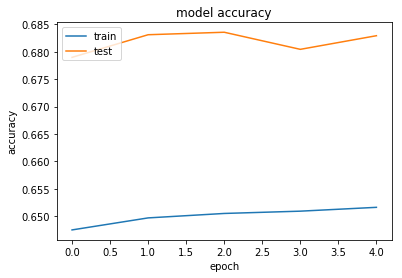

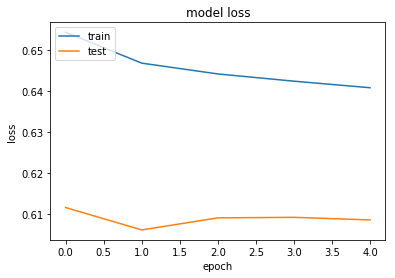

In [48]:
print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
#convert into vector with most probable result
predictDNN = model.predict(testX)
print(predictDNN)
predDNN = (predictDNN == predictDNN.max(axis=1)[:,None]).astype(int)
print(predDNN)

[[0.15434718 0.25839338 0.36667886 0.22058047]
 [0.16698746 0.26755223 0.32586986 0.23959045]
 [0.28381816 0.23046546 0.16642629 0.31929016]
 ...
 [0.5107079  0.12776896 0.08420927 0.27731383]
 [0.18504581 0.37778816 0.16228272 0.27488324]
 [0.13115887 0.30321565 0.3562337  0.20939174]]
[[0 0 1 0]
 [0 0 1 0]
 [0 0 0 1]
 ...
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]]


In [50]:
#classification report and log loss
print(classification_report(testY, predDNN, target_names = class_names))
print(log_loss(testY, predDNN))

              precision    recall  f1-score   support

      winter       0.33      0.40      0.36      3258
      spring       0.37      0.28      0.32      6342
      summer       0.65      0.47      0.55      9024
        fall       0.42      0.28      0.34      6202

   micro avg       0.47      0.36      0.41     24826
   macro avg       0.44      0.36      0.39     24826
weighted avg       0.48      0.36      0.41     24826
 samples avg       0.47      0.38      0.41     24826

28.207322819153838


In [51]:
#convert into format for confusion matrix
predDNNSingle = []
for i in range(0, len(predDNN)):
    predDNNSingle.append(np.argmax(predDNN[i]))

testYSingle = []
for i in range(0, len(testY)):
    testYSingle.append(np.argmax(testY[i]))
confusion_matrix(testYSingle, predDNNSingle)

array([[1312,  449,  644,  853],
       [ 837, 1687, 2084, 1169],
       [ 690, 1854, 3204, 1070],
       [1147,  771,  574,  977]])

Normalized confusion matrix
[[0.4  0.14 0.2  0.26]
 [0.14 0.29 0.36 0.2 ]
 [0.1  0.27 0.47 0.16]
 [0.33 0.22 0.17 0.28]]


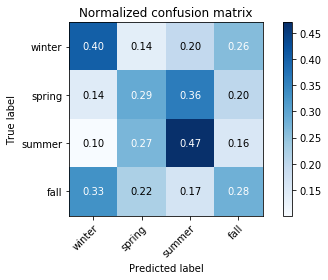

In [53]:
#confusion matrix plotting code from 
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plot_confusion_matrix(testYSingle, predDNNSingle, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()